In [ ]:
pip install scapy


     |████████████████████████████████| 1.1 MB 7.5 MB/s 
  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261554 sha256=59cdf05ab550c1f3472f10f20133c5801c18b4a1402d5878c93aaa81a1c10403
  Stored in directory: /root/.cache/pip/wheels/b9/6e/c0/0157e466a5e02d3ff28fc7587dff329b4a967a23b3f9b11385
Successfully built scapy


In [ ]:
pip install pyshark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/project3'

/content/drive/MyDrive/project3


In [ ]:
from ctypes import sizeof
import pyshark
from pyshark.packet.packet import Packet
from scapy.all import *
pcap_data = PcapReader(
    './GoogleHangout_VoIP_2_00001_20180411155434.pcap')

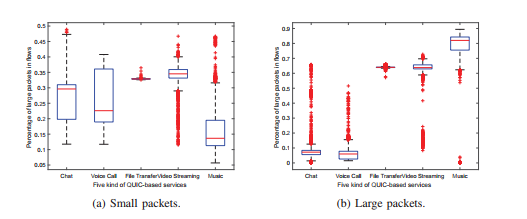

Dựa vào dấu hiệu về NetFlow chúng ta sẽ thực hiện tiền xử lý cho giai đoạn phân loại bằng giải thuật RandomForest bằng cách chia 1 luồng lớn thành các luồng nhỏ (mỗi luồng có 1000 gói tin) và thực hiện tính toàn:


*   Tỷ lệ % gói tin lớn có trong luồng.
*   Tỷ lệ % gói tin trung bình có trong luồng.
*   Tỷ lệ % gói tin nhỏ có trong luồng.
*   Độ dài trung bình của phần payload.

=> Sau đó tiến hành ghi dữ liệu vào file csv



In [ ]:
import csv

# # open the file in the write mode
# f = open('./X_train_1.csv', 'w')

# header = ['percent-small-packet', 'percent-medium-packet', 'percent-big-packet', 'average-payload', 'stamp']
# # create the csv writer
# writer = csv.writer(f)

# # write a row to the csv file
# writer.writerow(header)

# # close the file
# f.close()


In [ ]:
f = open('./X_train_1.csv', 'a')
writer = csv.writer(f)
index = 1
nbSmall = 0
nbMedium = 0
nbBig = 0
avgLength = 0

for packet in pcap_data:
    newPacket = packet.payload
    size = len(packet.payload)
    if index == 1000:
      nbSmall = nbSmall/1000
      nbMedium = nbMedium/1000
      nbBig = nbMedium/1000
      avgLength = avgLength/1000
      row = [ nbSmall, nbMedium, nbBig, avgLength, 1]
      writer.writerow(row)
      index = 1
      nbSmall = 0
      nbMedium = 0
      nbBig = 0
      avgLength = 0
    elif index < 1000:
      if size < 150 and size >0:
        nbSmall +=1
      elif size >= 150 and size < 1000:
        nbMedium +=1
      elif size >= 1000:
        nbBig += 1
      avgLength += size      
      index += 1
f.close()